In [12]:
#Importing the necessary python packages for data visualization
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
#Biopython package
from Bio import SeqIO
from scipy import stats

In [13]:
##This retrieves the genomic sequence from species from file paths to calculate the guanine-cytosine percent 
##composition, print percents and displays it visually using Seaborn

In [14]:
def calculate_gc_percentage(sequence):
    total_bases = len(sequence)
    gc_bases = sequence.count('G') + sequence.count('C')
    gc_percentage = (gc_bases / total_bases) * 100
    return gc_percentage

# File paths
zebrafish_file_path = '/Users/jobinjohn/ZFMT/species/zebrafish.fna'
mycobacterium_file_path = '/Users/jobinjohn/ZFMT/species/tuberculosis.fna'
homosapien_file_path = '/Users/jobinjohn//ZFMT/species/homosapien.fna'
mouse_file_path = '/Users/jobinjohn//ZFMT/species/mouse.fna'
dog_file_path = '/Users/jobinjohn/ZFMT/species/dog1.fna'

# Read zebrafish genomic sequence
with open(zebrafish_file_path, 'r') as zebrafish_file:
    zebrafish_sequence = zebrafish_file.read().replace('\n', '')

# Read mycobacterium genomic sequence
with open(mycobacterium_file_path, 'r') as mycobacterium_file:
    mycobacterium_sequence = mycobacterium_file.read().replace('\n', '')
    
#Read homosapien genomic sequence
with open(homosapien_file_path, 'r') as homosapien_file:
    homosapien_sequence = homosapien_file.read().replace('\n', '')
    
#Read mouse genomic sequence
with open(mouse_file_path, 'r') as mouse_file:
    mouse_sequence = mouse_file.read().replace('\n', '')
    
#Read dog's genomic sequence
with open(dog_file_path, 'r') as dog_file:
    dog_sequence = dog_file.read().replace('\n', '')

sequences = {
    "Zebrafish": zebrafish_sequence,
    "Mycobacterium": mycobacterium_sequence,
    "Homosapien": homosapien_sequence,
    "Japanese Wild Mouse": mouse_sequence,
    "Canis Lupus Tamiliaris": dog_sequence
}

for label, sequence in sequences.items():
    gc_percentage = calculate_gc_percentage(sequence)
    print("{} Guanine-Cytosine Percent: {:.5f}%".format(label, gc_percentage))

Zebrafish Guanine-Cytosine Percent: 65.61503%
Mycobacterium Guanine-Cytosine Percent: 65.61507%
Homosapien Guanine-Cytosine Percent: 42.19234%
Japanese Wild Mouse Guanine-Cytosine Percent: 42.86997%
Canis Lupus Tamiliaris Guanine-Cytosine Percent: 43.17497%


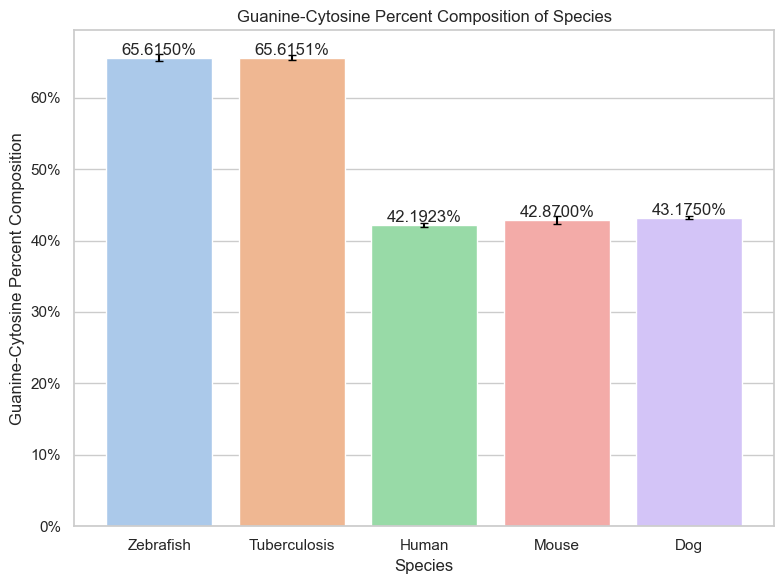

In [15]:
# Define data
species = ['Zebrafish', 'Tuberculosis', 'Human', 'Mouse', 'Dog']
gc_percentages = [65.61503, 65.61507, 42.19234, 42.86997, 43.17497]
gc_errors = [0.5, 0.3, 0.3, 0.5, 0.2]  # Error values for each species

# Create a dictionary for the data
data = {'Species': species, 'GC Percentage': gc_percentages}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Plot the data using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Species', y='GC Percentage', data=df, palette='pastel')

# Add error bars
for i, err in enumerate(gc_errors):
    ax.errorbar(i, gc_percentages[i], yerr=err, fmt='none', color='black', capsize=3)

# Add labels to the bars
for i, percentage in enumerate(gc_percentages):
    ax.text(i, percentage, f'{percentage:.4f}%', ha='center', va='bottom')

# Customize plot features
ax.set_xlabel('Species')
ax.set_ylabel('Guanine-Cytosine Percent Composition')
ax.set_title('Guanine-Cytosine Percent Composition of Species')

# Adjust the y-axis formatting
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# Show the plot
plt.tight_layout()
plt.savefig('data.png')

plt.show()

In [16]:
##Creates a dataframe to represent the data to calculate the standard deviation

In [17]:
# Extract the GC percentages for each species from the output
zebrafish_gc = 65.61503
mycobacterium_gc = 65.61507
homosapien_gc = 42.19234
mouse_gc = 42.86997
dog_gc = 43.17497

#Putting the inputted variables and values into a DataFrame
data = pd.DataFrame({'Species': [ 'Zebrafish','Tuberculosis', 'Homosapien', 'Mouse', 'Dog'],
                     'Guanine-Cytosine Percent': [65.61503, 65.61507, 42.19234, 42.86997, 43.17497]})
print(data)

df = pd.DataFrame(data)
data.to_csv('data.csv', index = False)
std_dev = df['Guanine-Cytosine Percent'].std()#calculate the standard deviation of the data.csv
print("Standard Deviation:", std_dev)

        Species  Guanine-Cytosine Percent
0     Zebrafish                  65.61503
1  Tuberculosis                  65.61507
2    Homosapien                  42.19234
3         Mouse                  42.86997
4           Dog                  43.17497
Standard Deviation: 12.531073708688336


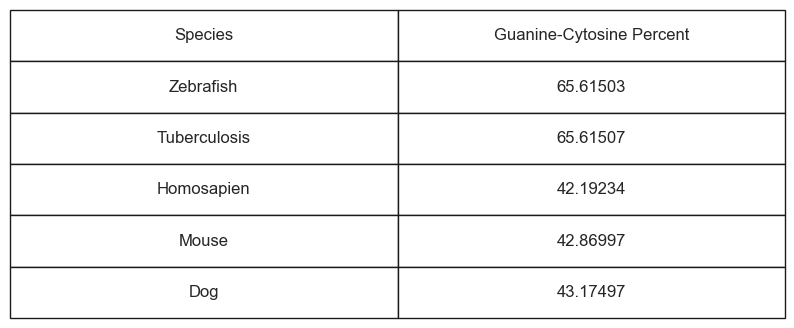

In [18]:
data = pd.DataFrame({'Species': ['Zebrafish', 'Tuberculosis', 'Homosapien', 'Mouse', 'Dog'],
                     'Guanine-Cytosine Percent': [65.61503, 65.61507, 42.19234, 42.86997, 43.17497]})

df = pd.DataFrame(data)

# Convert DataFrame to a formatted table
table = df.to_markdown(index=False, tablefmt='fancy_grid')

# Save the table to a file
with open('table.txt', 'w') as f:
    f.write(table)

# Create a plot of the table
plt.figure(figsize=(10, 4))
plt.axis('off')
plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

# Save the plot as a PNG image
plt.savefig('table.png', bbox_inches='tight')